## Read in Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

filename = "C:/Users/leygr/Desktop/210/Continuous/gwl-monthly.csv"

monthly_data = pd.read_csv(filename)
monthly_data.head()


,STATION,MSMT_DATE,WLM_RPE,WLM_RPE_QC,WLM_GSE,WLM_GSE_QC,RPE_WSE,RPE_WSE_QC,GSE_WSE,GSE_WSE_QC,WSE,WSE_QC
0,01N04E36Q001M,2005-05-01,9.1,1,6.9,1,17.438,1,15.238,1,-8.338,1
1,01N04E36Q001M,2005-06-01,9.1,1,6.9,1,17.330,1,15.130,1,-8.230,1
2,01N04E36Q001M,2005-07-01,9.1,1,6.9,1,17.361,1,15.161,1,-8.261,1
3,01N04E36Q001M,2005-08-01,9.1,1,6.9,1,17.513,1,15.313,1,-8.413,1
4,01N04E36Q001M,2005-09-01,9.1,1,6.9,1,17.890,1,15.690,1,-8.790,1


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

filename = "C:/Users/leygr/Desktop/210/Continuous/gwl-stations.csv"

stations_data = pd.read_csv(filename)
stations_data.head()


,STATION,SITE_CODE,STNAME,WELL_NAME,LATITUDE,LONGITUDE,LLDATUM,POSACC,ELEV,ELEVDATUM,ELEVACC,COUNTY_NAME,BASIN_CODE,BASIN_NAME,WELL_DEPTH,WELL_USE,WELL_TYPE,WCR_NO,WDL,COMMENT
0,01N04E36Q001M,378861N1214818W001,Middle River Barrier well 2W screen 61-81 ft bgs,MRL-2W,37.886056,-121.481833,NAD83,"Survey, 1m",6.9,NaN,R.L. AT SURFACE,San Joaquin,5-022.15,Tracy,81.0,Observation,Single Well,NaN,https://wdl.water.ca.gov/StationDetails.aspx?S...,01N04E36Q001M is part of a well cluster. Othe...
1,01N04E36Q002M,378849N1214822W001,Middle River Barrier well 3W screen 14-34 ft bgs,MRL-3W,37.884861,-121.482167,NAD83,"Survey, 1m",-1.0,NaN,R.L. AT SURFACE,San Joaquin,5-022.15,Tracy,34.0,Observation,Single Well,NaN,https://wdl.water.ca.gov/StationDetails.aspx?S...,01N04E36Q002M is part of a well cluster. Othe...
2,01N04E36Q003M,378860N1214819W001,Middle River Barrier well 2 screen 10-20 ft bgs,MLNO-2,37.886028,-121.481917,NAD83,"Survey, 1m",8.6,NaN,R.L. AT SURFACE,San Joaquin,5-022.15,Tracy,20.0,Observation,Single Well,NaN,https://wdl.water.ca.gov/StationDetails.aspx?S...,01N04E36Q003M is part of a well cluster. Othe...
3,01N04E36Q004M,378850N1214820W001,Middle River Barrier well 1 screen 10-20 ft bgs,MLNO-1,37.885028,-121.482000,NAD83,"Survey, 1m",15.9,NaN,R.L. AT SURFACE,San Joaquin,5-022.15,Tracy,20.0,Observation,Single Well,NaN,https://wdl.water.ca.gov/StationDetails.aspx?S...,01N04E36Q004M is part of a well cluster. Othe...
4,01S04E28F001M,378186N1215443W001,Grant Line Canal Barrier well 2W screen 10-25 ...,GLWL-2W,37.818556,-121.544333,NAD83,"Survey, 1m",16.1,NaN,R.L. AT SURFACE,San Joaquin,5-022.15,Tracy,25.0,Observation,Single Well,NaN,https://wdl.water.ca.gov/StationDetails.aspx?S...,01S04E28F001M is part of a well cluster. Othe...


# CNRA Continuous Well Data
_CNRA data available at:_ https://data.cnra.ca.gov/dataset/continuous-groundwater-level-measurements

#### Extract basin code in Central Valley

Need to deal with BLANKS later

In [24]:
central_valley = stations_data.loc[[(isinstance(s, str) and (s[:5] in ["5-006","5-021",'5-022'])) for s in stations_data["BASIN_CODE"]]]

In [25]:
central_valley

,STATION,SITE_CODE,STNAME,WELL_NAME,LATITUDE,LONGITUDE,LLDATUM,POSACC,ELEV,ELEVDATUM,ELEVACC,COUNTY_NAME,BASIN_CODE,BASIN_NAME,WELL_DEPTH,WELL_USE,WELL_TYPE,WCR_NO,WDL,COMMENT
0,01N04E36Q001M,378861N1214818W001,Middle River Barrier well 2W screen 61-81 ft bgs,MRL-2W,37.886056,-121.481833,NAD83,"Survey, 1m",6.90,NaN,R.L. AT SURFACE,San Joaquin,5-022.15,Tracy,81.0,Observation,Single Well,NaN,https://wdl.water.ca.gov/StationDetails.aspx?S...,01N04E36Q001M is part of a well cluster. Othe...
1,01N04E36Q002M,378849N1214822W001,Middle River Barrier well 3W screen 14-34 ft bgs,MRL-3W,37.884861,-121.482167,NAD83,"Survey, 1m",-1.00,NaN,R.L. AT SURFACE,San Joaquin,5-022.15,Tracy,34.0,Observation,Single Well,NaN,https://wdl.water.ca.gov/StationDetails.aspx?S...,01N04E36Q002M is part of a well cluster. Othe...
2,01N04E36Q003M,378860N1214819W001,Middle River Barrier well 2 screen 10-20 ft bgs,MLNO-2,37.886028,-121.481917,NAD83,"Survey, 1m",8.60,NaN,R.L. AT SURFACE,San Joaquin,5-022.15,Tracy,20.0,Observation,Single Well,NaN,https://wdl.water.ca.gov/StationDetails.aspx?S...,01N04E36Q003M is part of a well cluster. Othe...
3,01N04E36Q004M,378850N1214820W001,Middle River Barrier well 1 screen 10-20 ft bgs,MLNO-1,37.885028,-121.482000,NAD83,"Survey, 1m",15.90,NaN,R.L. AT SURFACE,San Joaquin,5-022.15,Tracy,20.0,Observation,Single Well,NaN,https://wdl.water.ca.gov/StationDetails.aspx?S...,01N04E36Q004M is part of a well cluster. Othe...
4,01S04E28F001M,378186N1215443W001,Grant Line Canal Barrier well 2W screen 10-25 ...,GLWL-2W,37.818556,-121.544333,NAD83,"Survey, 1m",16.10,NaN,R.L. AT SURFACE,San Joaquin,5-022.15,Tracy,25.0,Observation,Single Well,NaN,https://wdl.water.ca.gov/StationDetails.aspx?S...,01S04E28F001M is part of a well cluster. Othe...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,387485N1216339W002,387485N1216339W002,Yolo Bypass Hydrogeologic Study Well 2B2 scr: ...,YBHC-2B2,38.748543,-121.633933,NAD83,"Survey, 1m",29.36,NAVD88,R.L. AT SURFACE,Yolo,5-021.67,Yolo,55.0,Observation,Single Well,NaN,https://wdl.water.ca.gov/StationDetails.aspx?S...,NaN
483,387628N1216350W001,387628N1216350W001,Yolo Bypass Hydrogeologic Study Well 1B1 scr: ...,YBHC-1B1,38.762794,-121.635012,NAD83,"Survey, 1m",31.44,NAVD88,R.L. AT SURFACE,Yolo,5-021.67,Yolo,30.0,Observation,Single Well,NaN,https://wdl.water.ca.gov/StationDetails.aspx?S...,NaN
484,387628N1216350W002,387628N1216350W002,Yolo Bypass Hydrogeologic Study Well 1B2 scr: ...,YBHC-1B2,38.762809,-121.635026,NAD83,"Survey, 1m",31.66,NAVD88,R.L. AT SURFACE,Yolo,5-021.67,Yolo,50.0,Observation,Single Well,NaN,https://wdl.water.ca.gov/StationDetails.aspx?S...,NaN
485,387630N1216336W001,387630N1216336W001,Yolo Bypass Hydrogeologic Study Well 1C1 scr: ...,YBHC-1C1,38.762977,-121.633602,NAD83,"Survey, 1m",32.59,NAVD88,R.L. AT SURFACE,Yolo,5-021.67,Yolo,34.0,Observation,Single Well,NaN,https://wdl.water.ca.gov/StationDetails.aspx?S...,NaN


### Extract measurements in Central Valley

In [26]:
#extract all stations in monthly data that are in central valley station data
monthly_central_valley_site_codes = set(monthly_data.STATION).intersection(set(central_valley.STATION))

In [109]:
#monthly_central_valley_site_codes
len(monthly_central_valley_site_codes)


464

In [28]:
#extract all data from monthly_data that have a station in monthly_central valley site code
mm_cv = monthly_data.loc[[STATION in monthly_central_valley_site_codes for STATION in monthly_data.STATION]]

In [30]:
mm_cv

,STATION,MSMT_DATE,WLM_RPE,WLM_RPE_QC,WLM_GSE,WLM_GSE_QC,RPE_WSE,RPE_WSE_QC,GSE_WSE,GSE_WSE_QC,WSE,WSE_QC
0,01N04E36Q001M,2005-05-01,9.10,1,6.90,1,17.438,1,15.238,1,-8.338,1
1,01N04E36Q001M,2005-06-01,9.10,1,6.90,1,17.330,1,15.130,1,-8.230,1
2,01N04E36Q001M,2005-07-01,9.10,1,6.90,1,17.361,1,15.161,1,-8.261,1
3,01N04E36Q001M,2005-08-01,9.10,1,6.90,1,17.513,1,15.313,1,-8.413,1
4,01N04E36Q001M,2005-09-01,9.10,1,6.90,1,17.890,1,15.690,1,-8.790,1
...,...,...,...,...,...,...,...,...,...,...,...,...
73657,387630N1216336W002,2021-08-01,32.46,1,32.62,1,25.164,1,25.324,1,7.296,1
73658,387630N1216336W002,2021-09-01,32.46,1,32.62,1,23.770,1,23.930,1,8.690,1
73659,387630N1216336W002,2021-10-01,32.46,1,32.62,1,23.109,1,23.269,1,9.351,1
73660,387630N1216336W002,2021-11-01,32.46,1,32.62,1,21.394,1,21.554,1,11.066,1


In [31]:
mm_cv.to_csv("c:/users/leygr/desktop/210/continuous/CV-measurements.csv")

In [32]:
mm_cv_meta = pd.DataFrame(columns=['station','size','firstDate','lastDate'])


In [35]:
mm_cv_meta['size'] = mm_cv.MSMT_DATE.groupby(mm_cv.STATION).size()


mm_cv_meta['firstDate'] = mm_cv.MSMT_DATE.groupby(mm_cv.STATION).min()
mm_cv_meta['lastDate'] = mm_cv.MSMT_DATE.groupby(mm_cv.STATION).max()
mm_cv_meta['firstDate'] = mm_cv_meta['firstDate'].apply(lambda x : pd.to_datetime(str(x)))
mm_cv_meta['lastDate'] = mm_cv_meta['lastDate'].apply(lambda x : pd.to_datetime(str(x)))
mm_cv_meta['firstYear'] = mm_cv_meta['firstDate'].dt.year
mm_cv_meta['lastYear'] = mm_cv_meta['lastDate'].dt.year
#mm_cv_meta
#mm_cv['min']

The majority of wells have 100 observations or more

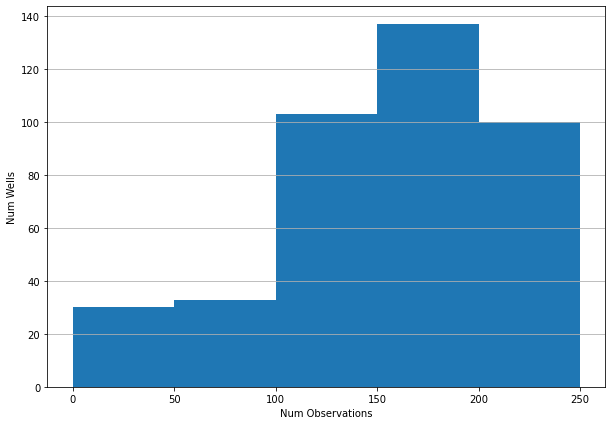

In [36]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(mm_cv_meta['size'], bins = [0,25, 50, 100, 150, 200, 250])
ax.grid(axis = 'y')
ax.set_ylabel('Num Wells')
ax.set_xlabel("Num Observations")
# Show plot
plt.show()


In [110]:
#mm_cv_meta['lastYear']

In [112]:
# Creating histogram

# fig, ax = plt.subplots(figsize =(10, 7))
# ax.hist(mm_cv_meta['lastYear'], bins = [2015, 2018, 2019, 2021, 2022])
# ax.grid(axis = 'y')
# ax.set_ylabel('Num Wells')
# ax.set_xlabel("last observation")
# # Show plot
# plt.show()



In [111]:
# Creating histogram
#Over 350 wells have observations in 2022
# recent = mm_cv_meta[mm_cv_meta['lastYear'] == 2022]
# fig, ax = plt.subplots(figsize =(10, 7))
# plt.scatter(recent['firstYear'],recent['size'])
# ax.grid(axis = 'y')
# ax.set_ylabel('Num Wells')
# ax.set_xlabel("first observation")
# # Show plot
# plt.show()



##### 119 wells have data starting before 2017 and up to 2022

In [75]:
recent = mm_cv_meta[mm_cv_meta['lastYear'] == 2022]
recent = recent[mm_cv_meta['firstYear'] < 2017]
recent['size']

C:\Users\leygr\AppData\Local\Temp/ipykernel_29432/3399049928.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  recent = recent[mm_cv_meta['firstYear'] < 2017]


STATION
07N02E35D001M    208
07N02E35D002M    210
07N02E35D003M    208
09N03E08C001M    362
09N03E08C002M    362
                ... 
30N03W18B002M    212
30N03W30Q002M    212
30N03W32P003M    212
30N04W10H004M    138
30N04W10H005M    138
Name: size, Length: 119, dtype: int64

In [76]:
mm_cv['sc'] = mm_cv['STATION']

C:\Users\leygr\AppData\Local\Temp/ipykernel_29432/2184366580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mm_cv['sc'] = mm_cv['STATION']


##### Extract the 119 wells from Measurement file

In [80]:
mm_cv_recent = mm_cv.merge(recent, on=['STATION'], how = 'inner')
mm_cv_recent

,STATION,MSMT_DATE,WLM_RPE,WLM_RPE_QC,WLM_GSE,WLM_GSE_QC,RPE_WSE,RPE_WSE_QC,GSE_WSE,GSE_WSE_QC,WSE,WSE_QC,sc,date,station,size,firstDate,lastDate,firstYear,lastYear
0,07N02E35D001M,2005-03-01,34.35,70,33.0,70,19.139,2,17.789,70,15.211,70,07N02E35D001M,2005-03-01,NaN,208,2005-03-01,2022-06-01,2005,2022
1,07N02E35D001M,2005-04-01,34.35,70,33.0,70,19.218,2,17.868,70,15.132,70,07N02E35D001M,2005-04-01,NaN,208,2005-03-01,2022-06-01,2005,2022
2,07N02E35D001M,2005-05-01,34.35,70,33.0,70,17.304,2,15.954,70,17.046,70,07N02E35D001M,2005-05-01,NaN,208,2005-03-01,2022-06-01,2005,2022
3,07N02E35D001M,2005-06-01,34.35,70,33.0,70,19.418,2,18.068,70,14.932,70,07N02E35D001M,2005-06-01,NaN,208,2005-03-01,2022-06-01,2005,2022
4,07N02E35D001M,2005-07-01,34.35,70,33.0,70,NaN,255,NaN,255,NaN,255,07N02E35D001M,2005-07-01,NaN,208,2005-03-01,2022-06-01,2005,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22704,30N04W10H005M,2021-10-01,421.20,1,418.7,1,26.139,1,23.639,1,395.061,1,30N04W10H005M,2021-10-01,NaN,138,2010-09-01,2022-02-01,2010,2022
22705,30N04W10H005M,2021-11-01,421.20,1,418.7,1,23.851,1,21.351,1,397.349,1,30N04W10H005M,2021-11-01,NaN,138,2010-09-01,2022-02-01,2010,2022
22706,30N04W10H005M,2021-12-01,421.20,1,418.7,1,23.119,1,20.619,1,398.081,1,30N04W10H005M,2021-12-01,NaN,138,2010-09-01,2022-02-01,2010,2022
22707,30N04W10H005M,2022-01-01,421.20,1,418.7,1,22.032,1,19.532,1,399.168,1,30N04W10H005M,2022-01-01,NaN,138,2010-09-01,2022-02-01,2010,2022


In [89]:
# convert MSMT_DATE to date
mm_cv_recent['MSMT_DATE'] = mm_cv_recent['MSMT_DATE'].apply(lambda x : pd.to_datetime(str(x)))
mm_cv_recent['MSMT_DATE']
mm_cv['date'] = mm_cv.loc[:, 'MSMT_DATE']

C:\Users\leygr\AppData\Local\Temp/ipykernel_29432/385871839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mm_cv['date'] = mm_cv.loc[:, 'MSMT_DATE']


In [90]:
by_site = mm_cv_recent.set_index(['STATION', 'MSMT_DATE'])
by_site

WLM_RPE  WLM_RPE_QC  WLM_GSE  WLM_GSE_QC  RPE_WSE  \
STATION       MSMT_DATE                                                       
07N02E35D001M 2005-03-01    34.35          70     33.0          70   19.139   
              2005-04-01    34.35          70     33.0          70   19.218   
              2005-05-01    34.35          70     33.0          70   17.304   
              2005-06-01    34.35          70     33.0          70   19.418   
              2005-07-01    34.35          70     33.0          70      NaN   
...                           ...         ...      ...         ...      ...   
30N04W10H005M 2021-10-01   421.20           1    418.7           1   26.139   
              2021-11-01   421.20           1    418.7           1   23.851   
              2021-12-01   421.20           1    418.7           1   23.119   
              2022-01-01   421.20           1    418.7           1   22.032   
              2022-02-01   421.20           1    418.7           1   22.188   

                          RPE_WSE_QC  GSE_WSE  GSE_WSE_QC      WSE  WSE_QC  \
STATION       MSMT_DATE                                                      
07N02E35D001M 2005-03-01           2   17.789          70   15.211      70   
              2005-04-01           2   17.868          70   15.132      70   
              2005-05-01           2   15.954          70   17.046      70   
              2005-06-01           2   18.068          70   14.932      70   
              2005-07-01         255      NaN         255      NaN     255   
...                              ...      ...         ...      ...     ...   
30N04W10H005M 2021-10-01           1   23.639           1  395.061       1   
              2021-11-01           1   21.351           1  397.349       1   
              2021-12-01           1   20.619           1  398.081       1   
              2022-01-01           1   19.532           1  399.168       1   
              2022-02-01           1   19.688           1  399.012       1   

                                     sc        date station  size  firstDate  \
STATION       MSMT_DATE                                                        
07N02E35D001M 2005-03-01  07N02E35D001M  2005-03-01     NaN   208 2005-03-01   
              2005-04-01  07N02E35D001M  2005-04-01     NaN   208 2005-03-01   
              2005-05-01  07N02E35D001M  2005-05-01     NaN   208 2005-03-01   
              2005-06-01  07N02E35D001M  2005-06-01     NaN   208 2005-03-01   
              2005-07-01  07N02E35D001M  2005-07-01     NaN   208 2005-03-01   
...                                 ...         ...     ...   ...        ...   
30N04W10H005M 2021-10-01  30N04W10H005M  2021-10-01     NaN   138 2010-09-01   
              2021-11-01  30N04W10H005M  2021-11-01     NaN   138 2010-09-01   
              2021-12-01  30N04W10H005M  2021-12-01     NaN   138 2010-09-01   
              2022-01-01  30N04W10H005M  2022-01-01     NaN   138 2010-09-01   
              2022-02-01  30N04W10H005M  2022-02-01     NaN   138 2010-09-01   

                           lastDate  firstYear  lastYear  
STATION       MSMT_DATE                                   
07N02E35D001M 2005-03-01 2022-06-01       2005      2022  
              2005-04-01 2022-06-01       2005      2022  
              2005-05-01 2022-06-01       2005      2022  
              2005-06-01 2022-06-01       2005      2022  
              2005-07-01 2022-06-01       2005      2022  
...                             ...        ...       ...  
30N04W10H005M 2021-10-01 2022-02-01       2010      2022  
              2021-11-01 2022-02-01       2010      2022  
              2021-12-01 2022-02-01       2010      2022  
              2022-01-01 2022-02-01       2010      2022  
              2022-02-01 2022-02-01       2010      2022  

[22709 rows x 18 columns]

##### Plot first 10 wells data

In [99]:
plot_fn = lambda sc: plt.plot(by_site.loc[sc].date, by_site.loc[sc].RPE_WSE)

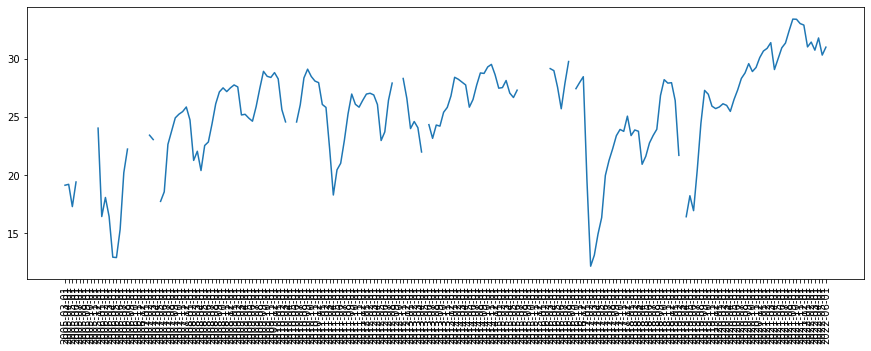

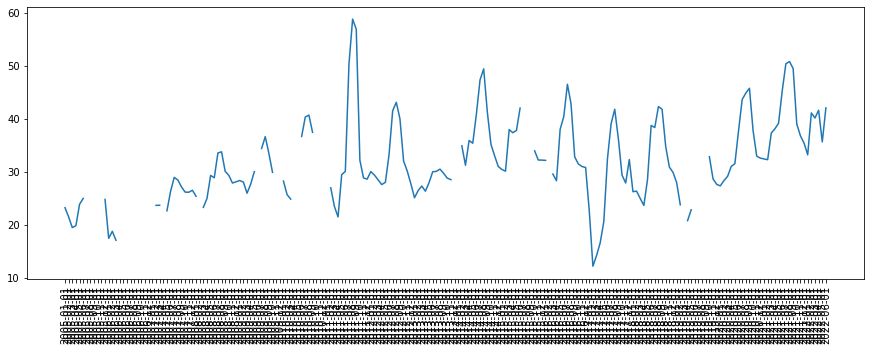

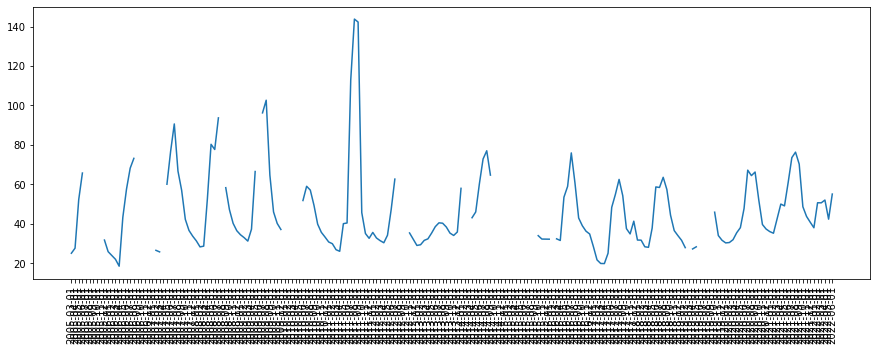

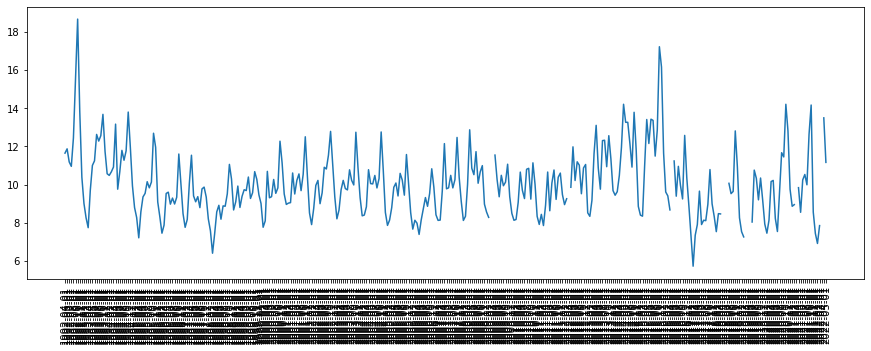

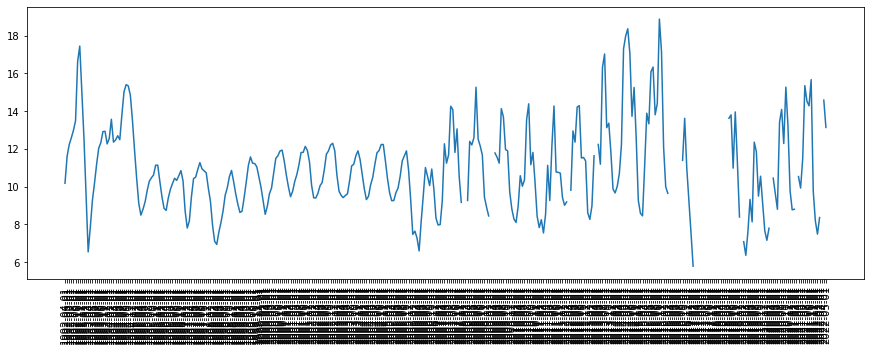

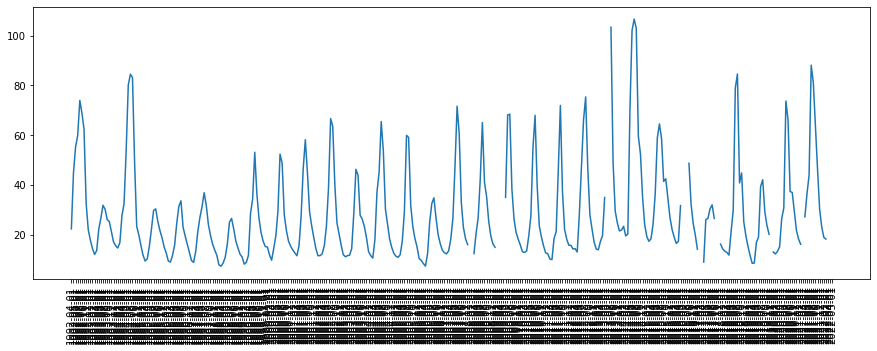

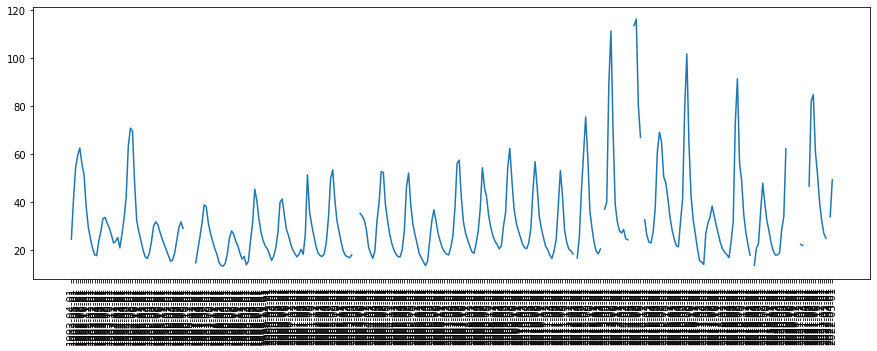

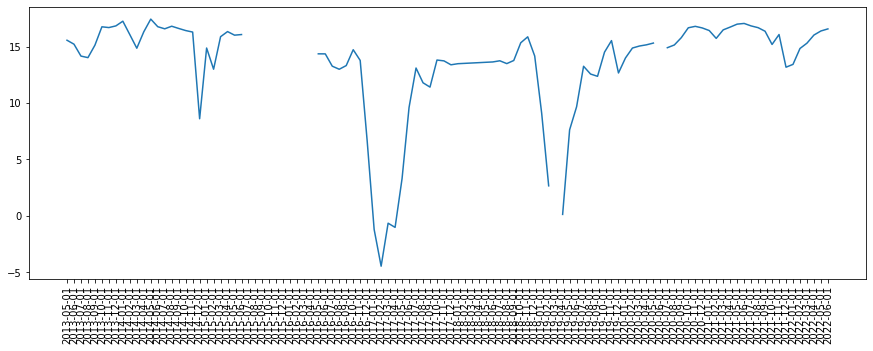

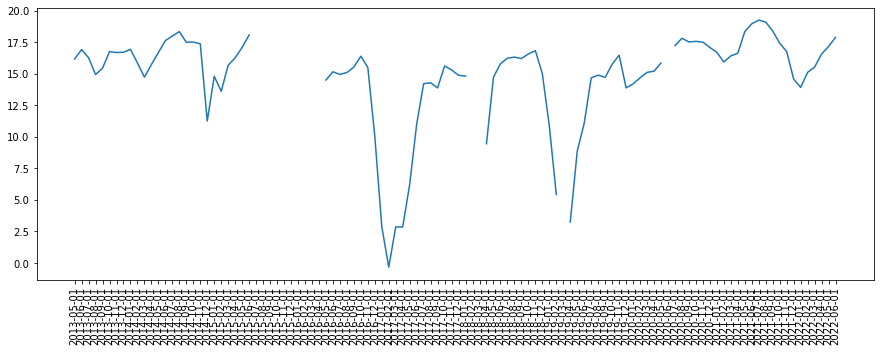

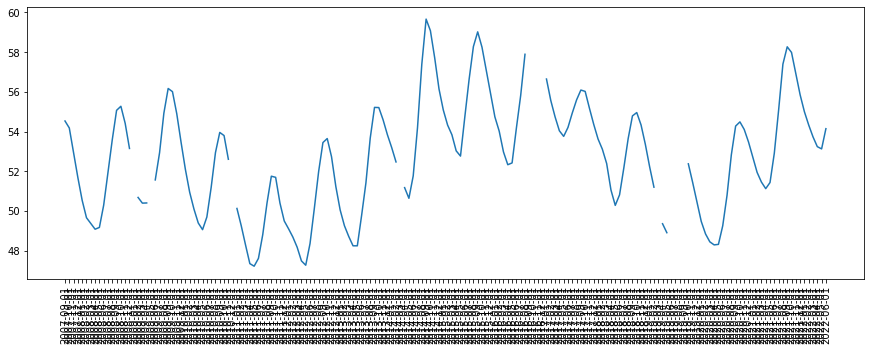

In [108]:
i=0
for st in by_site['sc'].unique():
    plt.figure(figsize=(15, 5))
    plot_fn(st)
#    fn('03N04E11L001M')
    plt.xticks(rotation=90)
    i += 1
    if (i == 10):
        break